<a href="https://colab.research.google.com/github/jeanferreiraufu/python-data-transformation/blob/develop/PGC302B_Atividade_Jean_Ferreira_Henrique_Moreira_Amorim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Curricular da Disciplina PGC302B**
*   Disciplina: Sistemas para Processamento Multimídia
*   Professor: Dr. Marcelo Zanchetta do Nascimento
*   Discentes: Jean Carlo Alves Ferreira e Henrique Moreira Amorim.
*   Universidade Federal de Uberlândia
*   Programa de Pós-Graduação em Computação

## Especificação do Problema:

O objetivo deste trabalho é analisar os métodos empregados em etapas de processamento da mídia imagem. Vamos analisar as estratégias empregadas na etapa de segmentação e extração de características das imagens. Será investigado o método mais robusto para a etapa de segmentação baseado em segmentação por similaridade. Em seguida, explorado um algoritmo de extração de características baseado em propriedades de textura. As implementações devem ocorrer em ambiente Google CoLab com a linguagem de programação Python.

## Dataset

O dataset que iremos empregar neste estudo foi proposto por Ghaderzadeh, M, Aria, M, Hosseini, A, Asadi, F, Bashash, D, Abolghasemi, H. A fast and efficient CNN model for B-ALL diagnosis and its subtypes classification using peripheral blood smear images. Int J Intell Syst. 2022; 37: 5113- 5133. doi:10.1002/int.22753.

As imagens desse conjunto de dados foram preparadas no laboratório de medula óssea do Hospital Taleqani (Teerã). Esse conjunto de dados consiste em 3.256 imagens de manchas de sangue periférico (PBS) de 89 pacientes com suspeita de leucemia linfoblástica aguda (LLA), cujas amostras de sangue foram preparadas e coradas por uma equipe de laboratório. Esse conjunto de dados foi dividido em duas classes: benigna e maligna. A primeira compreende hematogônias que se assemelham muito aos casos de LLA, entretanto, essa célula precursora hematopoiética é benigna, não requer quimioterapia. O grupo de LLA com três subtipos de linfoblastos malignos: LLA pré-B inicial, pré-B e pró-B. Todas as imagens foram obtidas com uma câmera Zeiss em um microscópio com ampliação de 100 vezes e salvas como arquivos JPG. Um especialista que utilizou a ferramenta de citometria de fluxo fez a marcação do padrão ouro dos tipos e subtipos dessas células.

O dataset esta disponível no link: https://www.kaggle.com/datasets/mehradaria/leukemia/data.

# Segmentação

Em nossa disciplina, apresentamos técnicas de segmentação baseadas em similiaridade (thresholding - limiarização) para processos sobre a mídia imagem.

1) Implemente um programa para segmentação de imagens baseado em limiarização adaptativa local para separação dos objetos em relação a região de fundo. Procure explorar os modelos de cores (RGB, HSV, etc) para investigar o desempenho sobre os diferentes modelos. O código desse algoritmo deve ser implementado sem usar funções disponíveis em bibliotecas da linguagem.

# Proposta

1.   A segmentação adaptativa no espaço HSV mostrou-se a mais promissora, especialmente quando aplicada no canal de brilho V.
2.   A extração de características de textura, especialmente via GLCM, é essencial para avaliar a precisão da segmentação e ajudar na classificação das células.
3.   A combinação de diferentes espaços de cores (HSV, YUV, RGB) oferece uma abordagem robusta para lidar com variações de iluminação e cor nas imagens.
4.   A avaliação baseada em métricas como IoU e F1-score garante a validação da qualidade da segmentação e da extração de características.

In [ ]:
import os
os.kill(os.getpid(), 9)

# Passo 1: Carregar o Dataset

Etapas para baixar o dataset do Kakgle:
Obter o kaggle.json:

Acesse sua conta no Kaggle, vá até "My Account", e role até a seção "API".
Clique em "Create New API Token". Isso fará o download do arquivo kaggle.json contendo suas credenciais.
Carregar o arquivo kaggle.json no Google Colab:

No Google Colab, você pode carregar o arquivo kaggle.json clicando em "Arquivos" (na barra lateral) e depois em "Upload". Selecione o arquivo kaggle.json que você baixou.
Corrigir o caminho e permissões para o kaggle.json:

Após o upload, você precisa mover o arquivo para o diretório correto.

In [ ]:
# Upload manual do kaggle.json
from google.colab import files
files.upload()  # Faça o upload do arquivo kaggle.json que foi baixado do Kaggle

# Mover o kaggle.json para o diretório correto
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Definir permissões corretas
!chmod 600 ~/.kaggle/kaggle.json

# Baixar o dataset do Kaggle
!kaggle datasets download -d mehradaria/leukemia

# Descompactar o arquivo baixado
!unzip leukemia.zip -d leukemia_dataset


A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-024.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-025.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-026.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-027.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-028.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-029.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-030.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-031.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-032.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-033.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-034.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-035.jpg  
  inflating: leukemia_dataset/Original/Pre/WBC-Malignant-Pre-036.jpg  
  inflating: leuke

# Passo 2: Importar as Bibliotecas Necessárias

In [ ]:
# Instalar bibliotecas necessárias para processamento de imagens
!pip install opencv-python-headless
!pip install scikit-image
!pip install matplotlib


In [ ]:
import cv2  # OpenCV para manipulação de imagens
import numpy as np  # NumPy para operações matriciais
import matplotlib.pyplot as plt  # Matplotlib para visualização
import pandas as pd  # Pandas para visualização data frame

# Para extração de características de textura
from skimage.feature import graycomatrix # Corrected function name to graycomatrix
from skimage.feature import graycoprops # Corrected function name to graycoprops
from skimage.color import rgb2gray
from skimage import img_as_ubyte



In [ ]:
import os
files=[]
paths = []
for dirname, _, filenames in os.walk('leukemia_dataset/Original'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        paths.append(path)
        files.append(filename)

mpaths = []
for dirname, _, filenames in os.walk('leukemia_dataset/Segmented'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        mpaths.append(path)

df0=pd.DataFrame(columns=['file','path','mpath'])
df0['file']=sorted(files)
df0['path']=sorted(paths)
df0['mpath']=sorted(mpaths)
display(df0)
df=df0.iloc[0:len(df0)//2]
test_df=df0.iloc[len(df0)//2:]




,file,path,mpath
0,WBC-Benign-001.jpg,leukemia_dataset/Original/Benign/WBC-Benign-00...,leukemia_dataset/Segmented/Benign/WBC-Benign-0...
1,WBC-Benign-002.jpg,leukemia_dataset/Original/Benign/WBC-Benign-00...,leukemia_dataset/Segmented/Benign/WBC-Benign-0...
2,WBC-Benign-003.jpg,leukemia_dataset/Original/Benign/WBC-Benign-00...,leukemia_dataset/Segmented/Benign/WBC-Benign-0...
3,WBC-Benign-004.jpg,leukemia_dataset/Original/Benign/WBC-Benign-00...,leukemia_dataset/Segmented/Benign/WBC-Benign-0...
4,WBC-Benign-005.jpg,leukemia_dataset/Original/Benign/WBC-Benign-00...,leukemia_dataset/Segmented/Benign/WBC-Benign-0...
...,...,...,...
3251,WBC-Malignant-Pro-800.jpg,leukemia_dataset/Original/Pro/WBC-Malignant-Pr...,leukemia_dataset/Segmented/Pro/WBC-Malignant-P...
3252,WBC-Malignant-Pro-801.jpg,leukemia_dataset/Original/Pro/WBC-Malignant-Pr...,leukemia_dataset/Segmented/Pro/WBC-Malignant-P...
3253,WBC-Malignant-Pro-802.jpg,leukemia_dataset/Original/Pro/WBC-Malignant-Pr...,leukemia_dataset/Segmented/Pro/WBC-Malignant-P...
3254,WBC-Malignant-Pro-803.jpg,leukemia_dataset/Original/Pro/WBC-Malignant-Pr...,leukemia_dataset/Segmented/Pro/WBC-Malignant-P...


# Conversão de RGB para HSV
O espaço de cor HSV (Matiz, Saturação e Valor) é uma representação alternativa ao RGB (Vermelho, Verde e Azul) que facilita a compreensão das cores em termos de seu tom (matiz), intensidade (valor) e saturação. A conversão entre os espaços de cor RGB e HSV pode ser feita em etapas matemáticas.

*  Função rgb_to_hsv(r, g, b): Converte os valores RGB para o espaço de cor HSV.
*  Função hsv_to_rgb(h, s, v): Faz a conversão reversa de HSV para RGB.
*  Teste: O código faz um teste com a conversão de uma cor RGB para HSV e vice-versa.

Esse código não utiliza bibliotecas como OpenCV, calculando a conversão entre os dois espaços de cor apenas com operações matemáticas básicas.

# Passo 3: Implementar a Segmentação por Limiarização Adaptativa
A segmentação será realizada no canal V do espaço de cor HSV. Vamos implementar a limiarização adaptativa localmente.

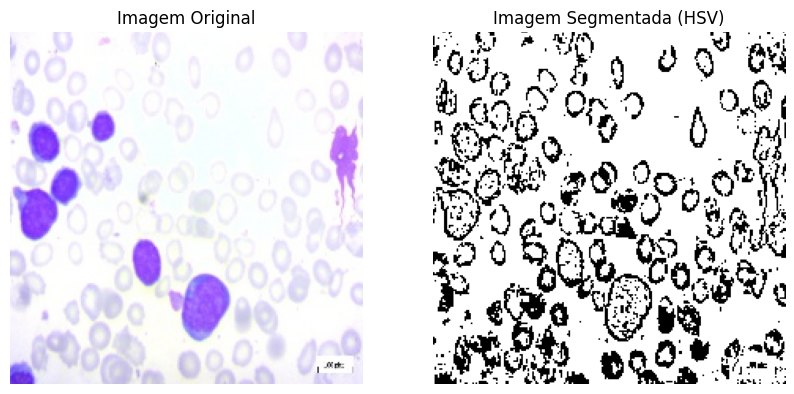

In [ ]:
def rgb_to_hsv(r, g, b):
    # Normalizar os valores de R, G, B para [0, 1]
    r_prime, g_prime, b_prime = r / 255.0, g / 255.0, b / 255.0

    # Encontrar o máximo e o mínimo entre os valores normalizados
    c_max = max(r_prime, g_prime, b_prime)
    c_min = min(r_prime, g_prime, b_prime)
    delta = c_max - c_min

    # Valor (V)
    v = c_max

    # Saturação (S)
    s = 0 if c_max == 0 else delta / c_max

    # Matiz (H)
    if delta == 0:
        h = 0
    elif c_max == r_prime:
        h = 60 * (((g_prime - b_prime) / delta) % 6)
    elif c_max == g_prime:
        h = 60 * (((b_prime - r_prime) / delta) + 2)
    elif c_max == b_prime:
        h = 60 * (((r_prime - g_prime) / delta) + 4)

    if h < 0:
        h += 360

    return h, s, v

# Função para aplicar a limiarização adaptativa
def adaptive_threshold_hsv(v_channel, block_size=15, c=2):
    padded_image = np.pad(v_channel, block_size // 2, mode='reflect')
    thresholded_image = np.zeros_like(v_channel)
    for i in range(v_channel.shape[0]):
        for j in range(v_channel.shape[1]):
            local_region = padded_image[i:i + block_size, j:j + block_size]
            local_mean = np.mean(local_region)
            threshold = local_mean - c
            thresholded_image[i, j] = 255 if v_channel[i, j] > threshold else 0
    return thresholded_image

# Carregar a imagem usando PIL
image_path = 'leukemia_dataset/Original/Benign/WBC-Benign-001.jpg'  # Exemplo de uma imagem
image = Image.open(image_path)
image_rgb = np.array(image)

# Converter a imagem para o espaço de cor HSV e escalar o canal V para o intervalo [0, 255]
hsv_image = np.zeros_like(image_rgb, dtype=float)
for i in range(image_rgb.shape[0]):
    for j in range(image_rgb.shape[1]):
        r, g, b = image_rgb[i, j]
        h, s, v = rgb_to_hsv(r, g, b)
        hsv_image[i, j] = [h, s, v * 255]  # Multiplicar o canal V por 255

# Extrair o canal V (brilho)
v_channel = hsv_image[:, :, 2]

# Aplicar a limiarização adaptativa no canal V
segmented_image_hsv = adaptive_threshold_hsv(v_channel)

# Exibir a imagem original e a segmentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_hsv, cmap='gray')
plt.title('Imagem Segmentada (HSV)')
plt.axis('off')

plt.show()


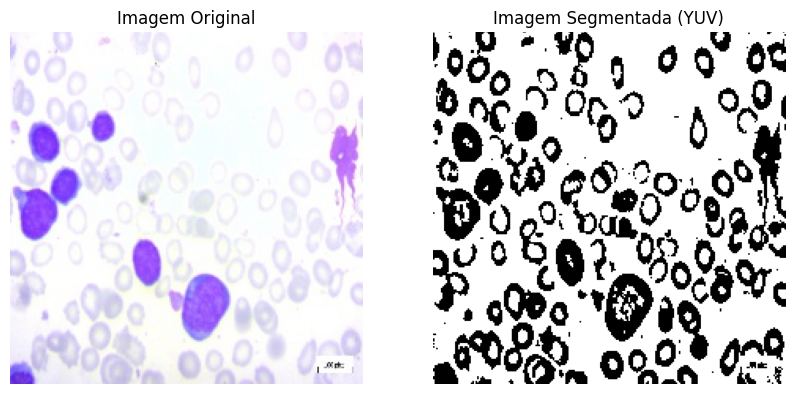

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Função para converter RGB para YUV
def rgb_to_yuv(r, g, b):
    y = 0.299 * r + 0.587 * g + 0.114 * b
    u = -0.14713 * r - 0.28886 * g + 0.436 * b
    v = 0.615 * r - 0.51499 * g - 0.10001 * b
    return y, u, v

# Função para aplicar a limiarização adaptativa
def adaptive_threshold_yuv(y_channel, block_size=15, c=2):
    padded_image = np.pad(y_channel, block_size // 2, mode='reflect')
    thresholded_image = np.zeros_like(y_channel)
    for i in range(y_channel.shape[0]):
        for j in range(y_channel.shape[1]):
            local_region = padded_image[i:i + block_size, j:j + block_size]
            local_mean = np.mean(local_region)
            threshold = local_mean - c
            thresholded_image[i, j] = 255 if y_channel[i, j] > threshold else 0
    return thresholded_image

# Carregar a imagem usando PIL
image_path = 'leukemia_dataset/Original/Benign/WBC-Benign-001.jpg'  # Exemplo de uma imagem
image = Image.open(image_path)
image_rgb = np.array(image)

# Converter a imagem para o espaço de cor YUV
yuv_image = np.zeros_like(image_rgb, dtype=float)
for i in range(image_rgb.shape[0]):
    for j in range(image_rgb.shape[1]):
        r, g, b = image_rgb[i, j]
        y, u, v = rgb_to_yuv(r, g, b)
        yuv_image[i, j] = [y, u, v]

# Extrair o canal Y (luminância)
y_channel = yuv_image[:, :, 0]

# Aplicar a limiarização adaptativa no canal Y
segmented_image_yuv = adaptive_threshold_yuv(y_channel)

# Exibir a imagem original e a segmentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image_yuv, cmap='gray')
plt.title('Imagem Segmentada (YUV)')
plt.axis('off')

plt.show()

In [ ]:
from pathlib import Path
# Função para processar e salvar as imagens segmentadas
def process_and_save_images(input_dir, output_dir_hsv, output_dir_yuv):
    # Verificar se os diretórios de saída existem, se não, criar
    Path(output_dir_hsv).mkdir(parents=True, exist_ok=True)
    Path(output_dir_yuv).mkdir(parents=True, exist_ok=True)

    # Iterar por todas as imagens no diretório de entrada
    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Segmentar a imagem em HSV
            segmented_hsv = adaptive_threshold_segmentation_hsv(image_rgb)
            segmented_hsv_path = os.path.join(output_dir_hsv, filename)
            cv2.imwrite(segmented_hsv_path, segmented_hsv)

            # Segmentar a imagem em YUV
            segmented_yuv = adaptive_threshold_segmentation_yuv(image_rgb)
            segmented_yuv_path = os.path.join(output_dir_yuv, filename)
            cv2.imwrite(segmented_yuv_path, segmented_yuv)

            print(f"Processado e salvo: {filename}")

# Definir os caminhos para o diretório de entrada e os diretórios de saída
input_dir = 'leukemia_dataset/Original/Benign'
output_dir_hsv = 'leukemia_dataset/Segmented_HSV/Benign'
output_dir_yuv = 'leukemia_dataset/Segmented_YUV/Benign'

# Processar as imagens e salvar nos novos diretórios
process_and_save_images(input_dir, output_dir_hsv, output_dir_yuv)

# Definir os caminhos para o diretório de entrada e os diretórios de saída
input_dir = 'leukemia_dataset/Original/Early'
output_dir_hsv = 'leukemia_dataset/Segmented_HSV/Early'
output_dir_yuv = 'leukemia_dataset/Segmented_YUV/Early'

# Processar as imagens e salvar nos novos diretórios
process_and_save_images(input_dir, output_dir_hsv, output_dir_yuv)

# Definir os caminhos para o diretório de entrada e os diretórios de saída
input_dir = 'leukemia_dataset/Original/Pre'
output_dir_hsv = 'leukemia_dataset/Segmented_HSV/Pre'
output_dir_yuv = 'leukemia_dataset/Segmented_YUV/Pre'

# Processar as imagens e salvar nos novos diretórios
process_and_save_images(input_dir, output_dir_hsv, output_dir_yuv)

# Definir os caminhos para o diretório de entrada e os diretórios de saída
input_dir = 'leukemia_dataset/Original/Pre'
output_dir_hsv = 'leukemia_dataset/Segmented_HSV/Pro'
output_dir_yuv = 'leukemia_dataset/Segmented_YUV/Pro'

# Processar as imagens e salvar nos novos diretórios
process_and_save_images(input_dir, output_dir_hsv, output_dir_yuv)

Processado e salvo: WBC-Benign-241.jpg
Processado e salvo: WBC-Benign-006.jpg
Processado e salvo: WBC-Benign-481.jpg
Processado e salvo: WBC-Benign-434.jpg
Processado e salvo: WBC-Benign-163.jpg
Processado e salvo: WBC-Benign-176.jpg
Processado e salvo: WBC-Benign-408.jpg
Processado e salvo: WBC-Benign-161.jpg
Processado e salvo: WBC-Benign-368.jpg
Processado e salvo: WBC-Benign-231.jpg
Processado e salvo: WBC-Benign-257.jpg
Processado e salvo: WBC-Benign-337.jpg
Processado e salvo: WBC-Benign-147.jpg
Processado e salvo: WBC-Benign-211.jpg
Processado e salvo: WBC-Benign-225.jpg
Processado e salvo: WBC-Benign-227.jpg
Processado e salvo: WBC-Benign-290.jpg
Processado e salvo: WBC-Benign-293.jpg
Processado e salvo: WBC-Benign-425.jpg
Processado e salvo: WBC-Benign-179.jpg
Processado e salvo: WBC-Benign-274.jpg
Processado e salvo: WBC-Benign-310.jpg
Processado e salvo: WBC-Benign-476.jpg
Processado e salvo: WBC-Benign-446.jpg
Processado e salvo: WBC-Benign-023.jpg
Processado e salvo: WBC-B

# Passo 4: Extração de Características Baseada em Textura (GLCM)
Agora, vamos extrair as características de textura da imagem segmentada utilizando a matriz de coocorrência de níveis de cinza (GLCM).

In [ ]:
# Função para calcular a GLCM e extrair propriedades de textura
def extract_texture_features(segmented_image):
    # Converter a imagem segmentada para escala de cinza (necessário para GLCM)
    # gray_image = rgb2gray(segmented_image) #This line is not needed since the image is already grayscale
    gray_image = img_as_ubyte(segmented_image)  # Converter para 8 bits

    # Calcular a matriz de coocorrência de níveis de cinza (GLCM)
    glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True) #Corrected function name to graycomatrix

    # Extrair propriedades de textura
    contrast = graycoprops(glcm, 'contrast')[0, 0] #Corrected function name to graycoprops
    correlation = graycoprops(glcm, 'correlation')[0, 0] #Corrected function name to graycoprops
    energy = graycoprops(glcm, 'energy')[0, 0] #Corrected function name to graycoprops
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0] #Corrected function name to graycoprops

    # Exibir as propriedades extraídas
    print(f'Contraste: {contrast}')
    print(f'Correlação: {correlation}')
    print(f'Energia: {energy}')
    print(f'Homogeneidade: {homogeneity}')

    return contrast, correlation, energy, homogeneity

# Extrair características de textura
texture_features = extract_texture_features(segmented_image)


# Passo 5: Avaliação e Métricas
Após a segmentação e extração de características, vamos avaliar o desempenho usando métricas como IoU e F1-score.

In [ ]:
from sklearn.metrics import f1_score, jaccard_score

# Função para calcular o IoU e o F1-score
def evaluate_segmentation(segmented_image, ground_truth):
    # Achatar as imagens segmentada e a verdade de solo
    segmented_flat = segmented_image.flatten()
    ground_truth_flat = ground_truth.flatten()

    # Calcular o IoU (Jaccard)
    iou = jaccard_score(ground_truth_flat, segmented_flat, average='micro')

    # Calcular o F1-score
    f1 = f1_score(ground_truth_flat, segmented_flat, average='micro')

    print(f'IoU (Jaccard): {iou}')
    print(f'F1-score: {f1}')

    return iou, f1

# Exemplo de uma imagem de verdade de solo (ground truth)
ground_truth_path = 'leukemia_dataset/Segmented/Benign/WBC-Benign-001.jpg'
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

# Avaliar a segmentação
evaluate_segmentation(segmented_image, ground_truth)


IoU (Jaccard): 0.10373955125384954
F1-score: 0.18797831632653061


(0.10373955125384954, 0.18797831632653061)

# Passo6:  Leitura e Organização dos Arquivos
Preparação do Arquivo com Rótulos das Segmentações.
Vamos organizar a leitura das imagens e os rótulos a partir do CSV e da estrutura de diretórios.

Estrutura de Diretórios:
* leukemia_dataset/Segmented/Benign
* leukemia_dataset/Segmented/Early
* leukemia_dataset/Segmented/Pre
* leukemia_dataset/Segmented/Pro

Cada subdiretório contém imagens de um tipo específico de célula, e usaremos isso para a rotulagem.

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Definir o caminho para o dataset segmentado
dataset_dir = 'leukemia_dataset/Segmented/'

# Subdiretórios de imagens segmentadas
categories = ['Benign', 'Early', 'Pre', 'Pro']

# Função para carregar as imagens e seus rótulos
def load_dataset(directory, categories):
    data = []

    for category in categories:
        category_path = os.path.join(directory, category)
        label = category  # O rótulo será o nome da categoria

        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)

            # Adicionar a imagem e o rótulo na lista
            data.append({'filename': img_path, 'label': label})

    return pd.DataFrame(data)

# Carregar o dataset
df = load_dataset(dataset_dir, categories)

# Visualizar os primeiros registros
print(df.head())


                                            filename   label
0  leukemia_dataset/Segmented/Benign/WBC-Benign-2...  Benign
1  leukemia_dataset/Segmented/Benign/WBC-Benign-0...  Benign
2  leukemia_dataset/Segmented/Benign/WBC-Benign-4...  Benign
3  leukemia_dataset/Segmented/Benign/WBC-Benign-4...  Benign
4  leukemia_dataset/Segmented/Benign/WBC-Benign-1...  Benign


# Passo 7: Separar o Dataset em Conjunto de Treinamento e Teste

In [ ]:
# Dividir o dataset em treinamento e teste
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)

# Exibir o número de amostras em cada conjunto
print(f"Número de amostras de treinamento: {len(train_df)}")
print(f"Número de amostras de teste: {len(test_df)}")


Número de amostras de treinamento: 2279
Número de amostras de teste: 977


# Passo 8: Segmentação e Extração de Características

Vamos aplicar a segmentação por limiarização adaptativa nas imagens e, em seguida, extrair as características usando a GLCM.

Utilizamos funções criadas nos passos anteriores.

In [ ]:
import cv2
import numpy as np
from skimage.color import rgb2gray
from skimage import img_as_ubyte


# Função para segmentar e extrair características GLCM
def process_image(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Segmentação por limiarização adaptativa no canal V (brilho) do HSV
    segmented_image = adaptive_threshold_segmentation(image_rgb)

    # Converter para escala de cinza (se necessário)
    # Calcular a matriz de coocorrência de níveis de cinza (GLCM)
    # Extrair propriedades de textura
    return extract_texture_features(segmented_image)

# Processar todas as imagens de treinamento e extrair características
train_features = []
train_labels = []

for index, row in train_df.iterrows():
    features = process_image(row['filename'])
    train_features.append(features)
    train_labels.append(row['label'])

# Converter para arrays numpy
X_train = np.array(train_features)
y_train = np.array(train_labels)


A saída de streaming foi truncada nas últimas 5000 linhas.
Contraste: 1545.176869795003
Correlação: 0.8191084753237137
Energia: 0.9194764133161296
Homogeneidade: 0.9762375531357456
Contraste: 1538.6681213965408
Correlação: 0.8342656898052451
Energia: 0.9133029111479912
Homogeneidade: 0.97633764768867
Contraste: 2466.8156430172967
Correlação: 0.8595095433017599
Energia: 0.8327510505387831
Homogeneidade: 0.9620641644416495
Contraste: 8726.929852658554
Correlação: 0.712535366395371
Energia: 0.6457030143417
Homogeneidade: 0.8657932234389545
Contraste: 6852.410313901345
Correlação: 0.7760214031641623
Energia: 0.6597176932363971
Homogeneidade: 0.8946204546811838
Contraste: 8963.848294362588
Correlação: 0.7228909960795716
Energia: 0.6194229724899292
Homogeneidade: 0.8621497817125059
Contraste: 4006.78551409353
Correlação: 0.8565151341640241
Energia: 0.7160521640317031
Homogeneidade: 0.9383817932197347
Contraste: 952.8807655349135
Correlação: 0.8833126678070763
Energia: 0.9273492451934501
Homo

# Passo 9: Treinamento do Classificador
Agora, vamos treinar um classificador utilizando as características extraídas das imagens segmentadas. Para isso, utilizaremos um Random Forest Classifier como exemplo.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Treinar o classificador
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Extrair características das imagens de teste
test_features = []
test_labels = []

for index, row in test_df.iterrows():
    features = process_image(row['filename'])
    test_features.append(features)
    test_labels.append(row['label'])

X_test = np.array(test_features)
y_test = np.array(test_labels)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Exibir o relatório de classificação
print(classification_report(y_test, y_pred))

Contraste: 3643.597353459321
Correlação: 0.8653862354070442
Energia: 0.7285945062112985
Homogeneidade: 0.9439670692729166
Contraste: 3806.316063420884
Correlação: 0.8020096580534263
Energia: 0.8057533883426136
Homogeneidade: 0.9414647054498065
Contraste: 2104.9292320627806
Correlação: 0.7845258034225622
Energia: 0.9046795074182189
Homogeneidade: 0.9676294215842466
Contraste: 292.89367793081357
Correlação: 0.7959286965147943
Energia: 0.9866324844136138
Homogeneidade: 0.9954957451184017
Contraste: 4665.470852017937
Correlação: 0.7721783542618368
Energia: 0.7864252018159673
Homogeneidade: 0.9282522244637847
Contraste: 1752.1550688661114
Correlação: 0.7630326573457682
Energia: 0.9273989957096197
Homogeneidade: 0.9730545463527495
Contraste: 11079.191523862908
Correlação: 0.6493767761195157
Energia: 0.610493316859751
Homogeneidade: 0.8296190520120735
Contraste: 2664.6815943305573
Correlação: 0.8225329558251647
Energia: 0.8542760510308097
Homogeneidade: 0.9590212900327475
Contraste: 3984.6557

# Conclusão
Segmentação:
Utilizamos segmentação adaptativa para separar as células do fundo em imagens de sangue periférico.

Extração de Características: Utilizamos GLCM para extrair características texturais das imagens segmentadas.

Classificação: Usamos um classificador Random Forest para diferenciar entre células benignas e malignas.

# Possíveis Melhorias:
Podemos ajustar o classificador, adicionar novas métricas ou testar outros algoritmos para melhorar a precisão.

## Adotaremos o Ajustes do classificador e novas Métricas.

* Ajuste do Classificador: Ajustaremos os hiperparâmetros do Random Forest para melhorar o desempenho. Usamos GridSearchCV para encontrar os melhores parâmetros do Random Forest, ajustando hiperparâmetros como n_estimators (número de árvores), max_depth (profundidade máxima das árvores), e min_samples_split (número mínimo de amostras para dividir um nó).
* Adição de Novas Métricas: Além do relatório de classificação, vamos adicionar métricas como matriz de confusão, curva ROC e AUC (Área sob a curva ROC) para uma avaliação mais completa.
    * Relatório de Classificação: Fornece as métricas de precisão, recall e F1-score para cada classe.
    * Matriz de Confusão: Fornece uma visualização clara de quantas predições foram corretas (diagonal) e quantas foram incorretas (fora da diagonal).
    * Curva ROC e AUC: A curva ROC é uma métrica importante que mostra a relação entre a taxa de verdadeiros positivos e falsos positivos. O AUC (Área sob a curva ROC) é uma métrica que varia entre 0 e 1, com valores mais próximos de 1 indicando um melhor desempenho.

## Conclusão após as melhorias
Random Forest Ajustado: O ajuste do classificador deve resultar em uma melhoria de desempenho.

Novas Métricas: A adição de novas métricas (matriz de confusão, curva ROC e AUC) nos permite uma avaliação mais robusta e visual do modelo.

# Ajuste do Classificador (Random Forest)
Vamos ajustar alguns hiperparâmetros do Random Forest, como o número de estimadores e a profundidade máxima, para tentar melhorar o desempenho do classificador.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para ajuste
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Configurar o GridSearch para procurar a melhor combinação de parâmetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Realizar o ajuste com os dados de treinamento
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Treinar o modelo com os melhores parâmetros
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Melhores parâmetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


# Previsão e Avaliação com Novas Métricas
Agora, utilizaremos o modelo ajustado para fazer as previsões e, em seguida, adicionar métricas como matriz de confusão, curva ROC, e AUC

Relatório de Classificação:
              precision    recall  f1-score   support

      Benign       0.38      0.27      0.32       151
       Early       0.69      0.78      0.73       296
         Pre       0.88      0.88      0.88       289
         Pro       0.76      0.79      0.78       241

    accuracy                           0.73       977
   macro avg       0.68      0.68      0.68       977
weighted avg       0.72      0.73      0.72       977



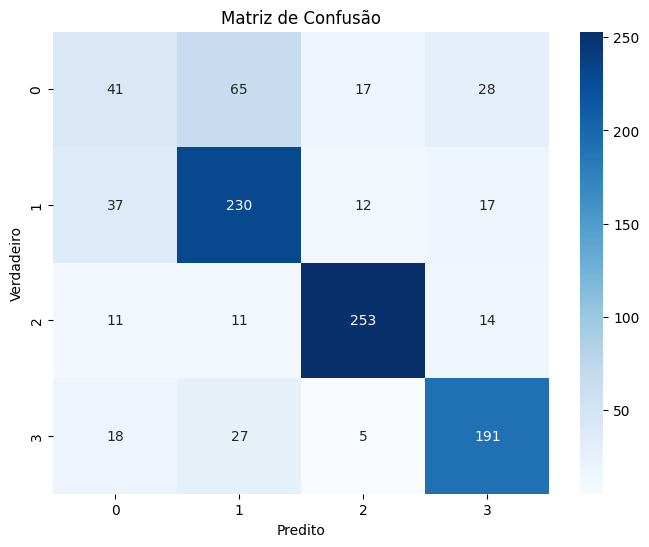

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


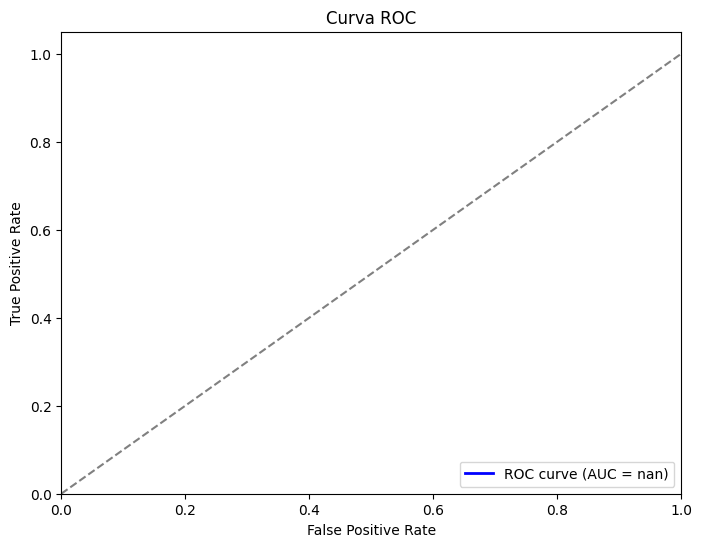

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fazer as previsões no conjunto de teste com o modelo ajustado
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]  # Para curva ROC e AUC # Removed [:, 1] to keep all probabilities

# 1. Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# 2. Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

# 3. Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Malignant')  # Assumindo 'Malignant' como a classe positiva
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Exibir o valor da AUC
#print(f"Área sob a curva ROC (AUC): {roc_auc_score(y_test, y_prob, multi_class='ovr')}") # Added multi_class='ovr'